## Derivation of the Normal Equations for Least Squares (Geophysical Inverse Theory Notation)

Given a set of observed data $\mathbf{d}$ and a linear model relating the data to model parameters $\mathbf{m}$ via the forward operator $\mathbf{G}$:

$$
\mathbf{d} = \mathbf{G} \mathbf{m} + \mathbf{\epsilon}
$$
where $\mathbf{\epsilon}$ is the data error vector.

The least squares solution seeks the model $\mathbf{m}$ that minimizes the sum of squared residuals:

$$
\min_{\mathbf{m}} \| \mathbf{d} - \mathbf{G} \mathbf{m} \|^2
$$

Expanding the objective function:

$$
S(\mathbf{m}) = (\mathbf{d} - \mathbf{G} \mathbf{m})^T (\mathbf{d} - \mathbf{G} \mathbf{m})
$$

To find the minimum, set the gradient with respect to $\mathbf{m}$ to zero:

$$
\frac{\partial S}{\partial \mathbf{m}} = -2 \mathbf{G}^T (\mathbf{d} - \mathbf{G} \mathbf{m}) = 0
$$

Rearranging gives the **normal equations**:

$$
\mathbf{G}^T \mathbf{G} \mathbf{m} = \mathbf{G}^T \mathbf{d}
$$

Solving for $\mathbf{m}$ yields the least squares solution:

$$
\mathbf{m}_{LS} = (\mathbf{G}^T \mathbf{G})^{-1} \mathbf{G}^T \mathbf{d}
$$

This is the standard result in geophysical inverse theory for linear problems.

## Geometric Interpretation of the Normal Equations

In geophysical inverse theory, the least squares problem can be interpreted geometrically as finding the point on the model plane $\mathcal{P}$ (spanned by the columns of $\mathbf{G}$) that is closest to the data vector $\mathbf{d}$.

The model plane is defined as:
$$
\mathcal{P} = \{ \mathbf{G} \mathbf{m} \mid \mathbf{m} \in \mathbb{R}^n \}
$$

The least squares solution $\mathbf{m}_{LS}$ is the model such that $\mathbf{G} \mathbf{m}_{LS}$ is the orthogonal projection of $\mathbf{d}$ onto $\mathcal{P}$.

The residual vector $\mathbf{r} = \mathbf{d} - \mathbf{G} \mathbf{m}_{LS}$ is orthogonal to the plane:
$$
\mathbf{G}^T \mathbf{r} = \mathbf{G}^T (\mathbf{d} - \mathbf{G} \mathbf{m}_{LS}) = 0
$$

This orthogonality condition leads directly to the normal equations:
$$
\mathbf{G}^T \mathbf{G} \mathbf{m}_{LS} = \mathbf{G}^T \mathbf{d}
$$

Thus, the least squares solution is the model whose predicted data $\mathbf{G} \mathbf{m}_{LS}$ is the closest point on the plane to the observed data $\mathbf{d}$, minimizing the Euclidean distance between them.

Estimated coefficients: [ 0.83383416 -1.57517832  0.54581396  0.54055831]
True coefficients: [1.0, -2.0, 0.5, 0.7]


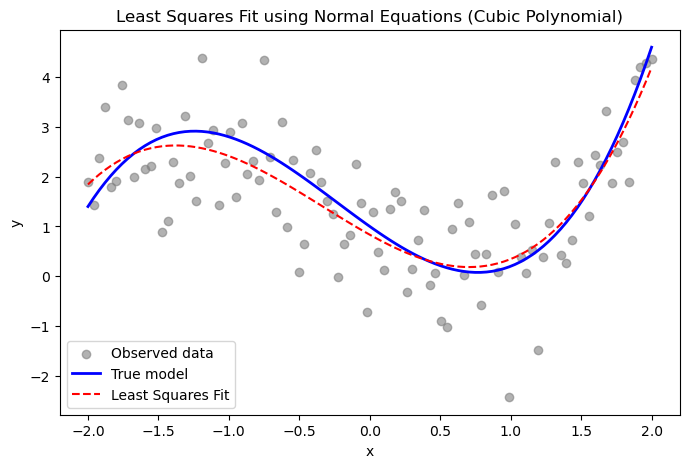

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
n_points = 100
x = np.linspace(-2, 2, n_points)
# True coefficients for cubic polynomial: y = a0 + a1*x + a2*x^2 + a3*x^3
true_coeffs = [1.0, -2.0, 0.5, 0.7]
y_true = (true_coeffs[0] +
          true_coeffs[1]*x +
          true_coeffs[2]*x**2 +
          true_coeffs[3]*x**3)
noise = np.random.normal(0, 1, n_points)
y_obs = y_true + noise

# Build the design (forward) matrix G
G = np.vstack([np.ones_like(x), x, x**2, x**3]).T

# Solve normal equations: m = (G^T G)^(-1) G^T d
GTG = G.T @ G
GTd = G.T @ y_obs
m_est = np.linalg.inv(GTG) @ GTd

# Predicted data
y_pred = G @ m_est

# Print estimated coefficients
print("Estimated coefficients:", m_est)
print("True coefficients:", true_coeffs)

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(x, y_obs, label='Observed data', color='gray', alpha=0.6)
plt.plot(x, y_true, label='True model', color='blue', linewidth=2)
plt.plot(x, y_pred, label='Least Squares Fit', color='red', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Fit using Normal Equations (Cubic Polynomial)')
plt.show()

## Incorporating Gaussian Uncertainties in Least Squares

In many geophysical inverse problems, the observed data $\mathbf{d}$ are subject to measurement errors or uncertainties, often assumed to be Gaussian (normally distributed) with known covariance $\mathbf{C}_d$.

The general linear model is:
$$
\mathbf{d} = \mathbf{G} \mathbf{m} + \mathbf{\epsilon}
$$
where $\mathbf{\epsilon}$ is a random error vector with $\langle \mathbf{\epsilon} \rangle = 0$ and $\langle \mathbf{\epsilon} \mathbf{\epsilon}^T \rangle = \mathbf{C}_d$.

To account for these uncertainties, the least squares objective function is weighted by the inverse of the data covariance:
$$
S(\mathbf{m}) = (\mathbf{d} - \mathbf{G} \mathbf{m})^T \mathbf{C}_d^{-1} (\mathbf{d} - \mathbf{G} \mathbf{m})
$$

Minimizing $S(\mathbf{m})$ leads to the **generalized normal equations**:
$$
\mathbf{G}^T \mathbf{C}_d^{-1} \mathbf{G} \mathbf{m} = \mathbf{G}^T \mathbf{C}_d^{-1} \mathbf{d}
$$

This approach properly weights each data point according to its uncertainty, giving less influence to noisier measurements and yielding a statistically optimal solution under the Gaussian error assumption.

## Interlude: Data Uncertainty and Probability Distributions

In geophysical data analysis, uncertainty is often described using probability distributions. A probability distribution characterizes the likelihood of different outcomes for a random variable.

### Probability Density Functions (PDFs)
A probability density function (PDF) $p(x)$ describes the relative likelihood for a continuous random variable $x$ to take on a given value. The area under the PDF over all possible values is 1:
$$
\int_{-\infty}^{\infty} p(x) \, dx = 1
$$

### Common Probability Distributions
- **Normal (Gaussian) Distribution:**
  - Most common in geophysics for modeling measurement errors.
  - PDF: $p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$
  - Characterized by mean $\mu$ and standard deviation $\sigma$.
- **Uniform Distribution:**
  - All values in a range are equally likely.
  - PDF: $p(x) = \frac{1}{b-a}$ for $x \in [a, b]$.
- **Exponential Distribution:**
  - Models time between random events.
  - PDF: $p(x) = \lambda e^{-\lambda x}$ for $x \geq 0$.
- **Poisson Distribution:**
  - Discrete distribution for counts of events in a fixed interval.
  - Probability mass function: $P(k) = \frac{\lambda^k e^{-\lambda}}{k!}$

### Why Distributions Matter
Understanding the type and properties of data uncertainty is crucial for:
- Choosing appropriate statistical models
- Weighting data in inverse problems
- Interpreting results and confidence intervals

In practice, the normal distribution is often assumed due to the Central Limit Theorem, but other distributions may be more appropriate depending on the data and measurement process.

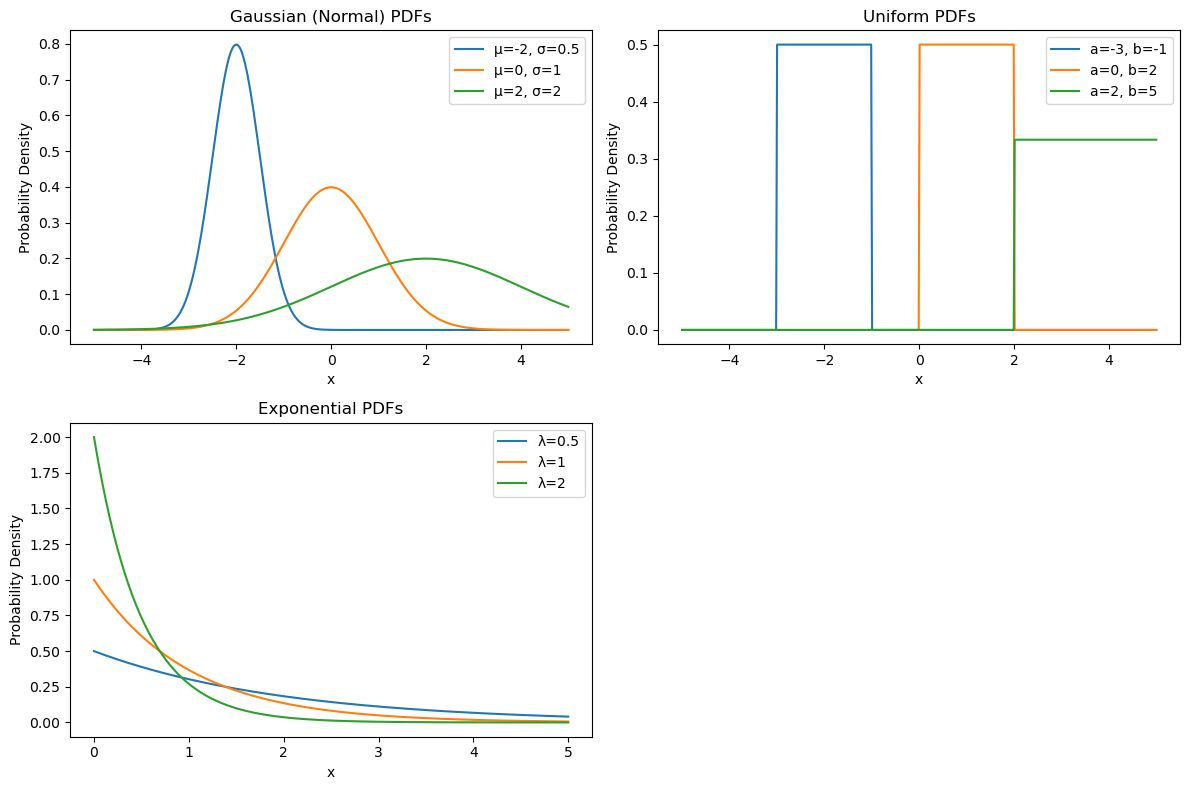

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, expon

x = np.linspace(-5, 5, 500)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gaussian PDFs
for mu, sigma in [(-2, 0.5), (0, 1), (2, 2)]:
    axs[0, 0].plot(x, norm.pdf(x, mu, sigma), label=f'μ={mu}, σ={sigma}')
axs[0, 0].set_title('Gaussian (Normal) PDFs')
axs[0, 0].legend()
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('Probability Density')

# Uniform PDFs
for a, b in [(-3, -1), (0, 2), (2, 5)]:
    axs[0, 1].plot(x, uniform.pdf(x, a, b-a), label=f'a={a}, b={b}')
axs[0, 1].set_title('Uniform PDFs')
axs[0, 1].legend()
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('Probability Density')

# Exponential PDFs
x_exp = np.linspace(0, 5, 500)
for lam in [0.5, 1, 2]:
    axs[1, 0].plot(x_exp, expon.pdf(x_exp, scale=1/lam), label=f'λ={lam}')
axs[1, 0].set_title('Exponential PDFs')
axs[1, 0].legend()
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('Probability Density')

# Remove the fourth subplot (Poisson)
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()


## Least Squares and Maximum Likelihood: The L2 Norm Connection

When errors are assumed to be independent and Gaussian, minimizing the L2 norm (sum of squared errors) is mathematically equivalent to maximizing the likelihood of the model parameters.

**Mathematical Derivation:**
- The likelihood of observing data $\mathbf{d}$ given model $\mathbf{m}$ is:
$$
L(\mathbf{m}) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(d_i - (Gm)_i)^2}{2\sigma^2}\right)
$$
- The log-likelihood is:
$$
\log L(\mathbf{m}) = -\frac{N}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^N (d_i - (Gm)_i)^2
$$
- Maximizing $\log L(\mathbf{m})$ is equivalent to minimizing $\sum_{i=1}^N (d_i - (Gm)_i)^2$, the L2 norm of the error.

**Conclusion:**
- The least squares solution is the maximum likelihood estimate under the assumption of Gaussian errors.
- This connection provides a statistical foundation for using the L2 norm in inverse problems and regression.

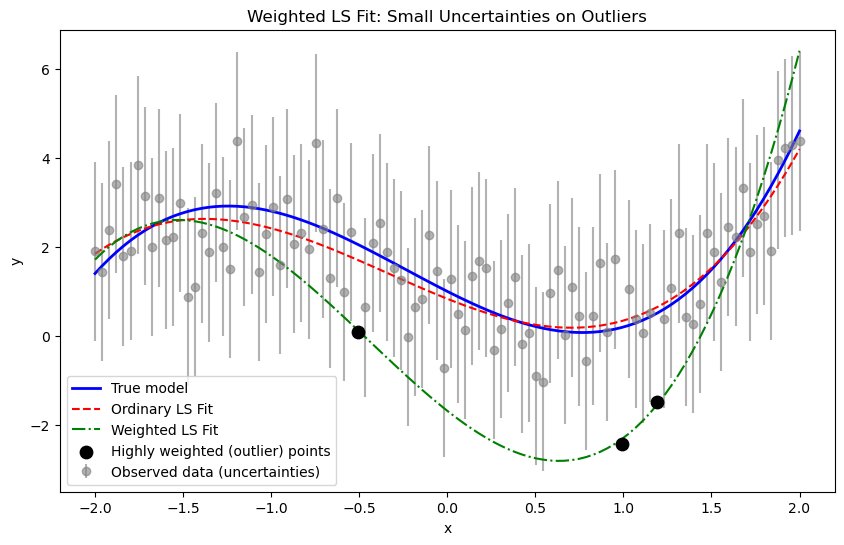

True coefficients: [1.0, -2.0, 0.5, 0.7]
Ordinary LS coefficients: [ 0.83383416 -1.57517832  0.54581396  0.54055831]
Weighted LS coefficients: [-1.68019593 -3.11279389  1.43400864  1.07118518]
Indices of highly weighted points: [37 79 74]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
n_points = 100
x = np.linspace(-2, 2, n_points)
true_coeffs = [1.0, -2.0, 0.5, 0.7]
y_true = (true_coeffs[0] +
          true_coeffs[1]*x +
          true_coeffs[2]*x**2 +
          true_coeffs[3]*x**3)
noise = np.random.normal(0, 1, n_points)
y_obs = y_true + noise

# Find indices of points farthest from the true model
residuals = np.abs(y_obs - y_true)
special_indices = np.argsort(residuals)[-3:]  # 3 largest residuals

# Assign uncertainties: small for farthest points, large for others
sigma = np.ones(n_points)
sigma[:] = 2.0  # large uncertainty for most
sigma[special_indices] = 0.05  # very small uncertainty for farthest points

# Build the design matrix G
G = np.vstack([np.ones_like(x), x, x**2, x**3]).T

# Weighted least squares solution
W = np.diag(1/sigma**2)  # Weight matrix is inverse variance
GTWG = G.T @ W @ G
GTWy = G.T @ W @ y_obs
m_wls = np.linalg.inv(GTWG) @ GTWy

# Predicted data
y_pred_wls = G @ m_wls

# Compare with ordinary least squares
GTG = G.T @ G
GTd = G.T @ y_obs
m_ols = np.linalg.inv(GTG) @ GTd
y_pred_ols = G @ m_ols

# Plot results
plt.figure(figsize=(10, 6))
plt.errorbar(x, y_obs, yerr=sigma, fmt='o', label='Observed data (uncertainties)', color='gray', alpha=0.6)
plt.plot(x, y_true, label='True model', color='blue', linewidth=2)
plt.plot(x, y_pred_ols, label='Ordinary LS Fit', color='red', linestyle='--')
plt.plot(x, y_pred_wls, label='Weighted LS Fit', color='green', linestyle='-.')
plt.scatter(x[special_indices], y_obs[special_indices], color='black', s=80, zorder=5, label='Highly weighted (outlier) points')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Weighted LS Fit: Small Uncertainties on Outliers')
plt.show()

print('True coefficients:', true_coeffs)
print('Ordinary LS coefficients:', m_ols)
print('Weighted LS coefficients:', m_wls)
print('Indices of highly weighted points:', special_indices)

## Variance, Standard Deviation, and Covariance: Basic Definitions

**Variance** measures how much a set of numbers is spread out from their mean. For a sample of $N$ values $x_1, x_2, \ldots, x_N$:
$$
\text{Variance:}\quad s^2 = \frac{1}{N} \sum_{i=1}^N (x_i - \bar{x})^2
$$
where $\bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$ is the sample mean.

**Standard deviation** is the square root of the variance, giving a measure of spread in the same units as the data:
$$
\text{Standard deviation:}\quad s = \sqrt{s^2}
$$

**Covariance** extends the idea of variance to two variables, measuring how they vary together. For two samples $x_1, \ldots, x_N$ and $y_1, \ldots, y_N$:
$$
\text{Covariance:}\quad s_{xy} = \frac{1}{N} \sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})
$$
where $\bar{x}$ and $\bar{y}$ are the sample means of $x$ and $y$.

- If $s_{xy} > 0$, $x$ and $y$ tend to increase together.
- If $s_{xy} < 0$, one tends to increase as the other decreases.
- If $s_{xy} = 0$, they are uncorrelated.

For multiple variables, the **covariance matrix** collects all pairwise covariances.

## Linear Error Propagation

When a function depends on several variables, uncertainties in those variables propagate to the function's output. For a linear function, error propagation is especially straightforward.

Suppose $y$ is a function of $n$ independent variables $x_1, x_2, \ldots, x_n$:
$$
y = f(x_1, x_2, \ldots, x_n)
$$
If the uncertainties in $x_i$ are small, we can use a first-order Taylor expansion about the mean values:
$$
y \approx f(\bar{x}_1, \ldots, \bar{x}_n) + \sum_{i=1}^n \frac{\partial f}{\partial x_i} (x_i - \bar{x}_i)
$$
The variance of $y$ is then:
$$
\sigma_y^2 = \mathrm{Var}(y) \approx \sum_{i=1}^n \left( \frac{\partial f}{\partial x_i} \right)^2 \sigma_{x_i}^2
$$
where $\sigma_{x_i}^2$ is the variance of $x_i$ and we have assumed the $x_i$ are independent (so covariances vanish).

### Scalar Linear Function
Suppose $y$ is a linear function:
$$
y = a_1 x_1 + a_2 x_2 + \cdots + a_n x_n
$$
Then $\frac{\partial y}{\partial x_i} = a_i$, so:
$$
\sigma_y^2 = \sum_{i=1}^n a_i^2 \sigma_{x_i}^2
$$
#### Example: Summing Two Variables
If $y = x_1 + x_2$, then $a_1 = a_2 = 1$:
$$
\sigma_y^2 = \sigma_{x_1}^2 + \sigma_{x_2}^2
$$
#### Example: Weighted Sum
If $y = 2x_1 - 3x_2$, then:
$$
\sigma_y^2 = 4\sigma_{x_1}^2 + 9\sigma_{x_2}^2
$$

### Generalization to Matrix Linear Operations
For a vector of outputs $\mathbf{y}$ related to a vector of inputs $\mathbf{x}$ by a matrix $\mathbf{A}$:
$$
\mathbf{y} = \mathbf{A} \mathbf{x}
$$
If $\mathbf{C}_x$ is the covariance matrix of $\mathbf{x}$, the covariance of $\mathbf{y}$ is:
$$
\mathbf{C}_y = \mathbf{A} \mathbf{C}_x \mathbf{A}^T
$$
This formula allows propagation of uncertainties through any linear transformation, including sums, differences, and more general matrix operations.

### Derivation: Model Covariance from Linear Error Propagation
Suppose we solve a linear inverse problem of the form:
$$
\mathbf{d} = \mathbf{G} \mathbf{m} + \mathbf{e}
$$
where $\mathbf{d}$ is the data vector, $\mathbf{G}$ is the forward matrix, $\mathbf{m}$ is the model parameter vector, and $\mathbf{e}$ is the data error (with covariance $\mathbf{C}_d$).

The weighted least squares solution for the model parameters is:
$$
\mathbf{m}_{\text{est}} = (\mathbf{G}^T \mathbf{C}_d^{-1} \mathbf{G})^{-1} \mathbf{G}^T \mathbf{C}_d^{-1} \mathbf{d}
$$

To find the covariance of $\mathbf{m}_{\text{est}}$, we use the linear error propagation formula. The solution is a linear function of the data:
$$
\mathbf{m}_{\text{est}} = \mathbf{A} \mathbf{d}, \quad \text{where} \quad \mathbf{A} = (\mathbf{G}^T \mathbf{C}_d^{-1} \mathbf{G})^{-1} \mathbf{G}^T \mathbf{C}_d^{-1}
$$

Applying the general formula for propagation of covariance through a linear transformation:
$$
\mathbf{C}_m = \mathbf{A} \mathbf{C}_d \mathbf{A}^T
$$

Substituting for $\mathbf{A}$ and simplifying (using properties of matrix inverses and transposes):
$$
\mathbf{C}_m = (\mathbf{G}^T \mathbf{C}_d^{-1} \mathbf{G})^{-1}
$$

This is the standard result for the posterior covariance matrix of the model parameters in linear weighted least squares. The diagonal elements give the variances of each parameter estimate, and the off-diagonal elements describe covariances (correlations) between parameter estimates.

In [3]:
# Compute parameter uncertainties for the polynomial curve fitting example
import numpy as np

# Assume G, y_obs, and sigma (data uncertainties) are already defined from previous cells
# If not, re-define them here as in the earlier example

# Weight matrix (inverse variance)
W = np.diag(1 / sigma**2)

# Covariance matrix of the model parameters (from weighted least squares theory):
# Cov(m) = (G^T W G)^{-1}
GTWG = G.T @ W @ G
cov_m = np.linalg.inv(GTWG)

# Standard errors (uncertainties) on each model parameter are the square roots of the diagonal
param_errors = np.sqrt(np.diag(cov_m))

print("Estimated model parameters:", m_wls)
print("Standard errors on parameters:", param_errors)

# Optionally, display as a table
import pandas as pd
param_names = ["a0", "a1", "a2", "a3"]
df = pd.DataFrame({"Parameter": param_names, "Estimate": m_wls, "Std Error": param_errors})
display(df)

Estimated model parameters: [-1.68019593 -3.11279389  1.43400864  1.07118518]
Standard errors on parameters: [0.0753989  0.10655227 0.10847334 0.07648759]


,Parameter,Estimate,Std Error
0,a0,-1.680196,0.075399
1,a1,-3.112794,0.106552
2,a2,1.434009,0.108473
3,a3,1.071185,0.076488


## Statistical Aspects of Least Squares: $\chi^2$ Distribution, $p$-Value, and $F$-Test

**1. The $\chi^2$ (Chi-Squared) Distribution in Least Squares**

- In least squares, the sum of squared residuals (errors) divided by the variance of the errors follows a $\chi^2$ distribution if the errors are independent and Gaussian:
  $$
  \chi^2 = \sum_{i=1}^N \left(\frac{d_i - (Gm)_i}{\sigma_i}\right)^2
  $$
- For a good fit, $\chi^2$ should be approximately equal to the degrees of freedom ($N - p$), where $N$ is the number of data points and $p$ is the number of model parameters.
- The $\chi^2$ statistic is used to assess the goodness-of-fit: large values indicate poor fit, small values may indicate overfitting or overestimated uncertainties.

- The **probability density function (PDF)** for the $\chi^2$ distribution with $k$ degrees of freedom is:
  $$
  f(z; k) = \frac{1}{2^{k/2} \Gamma(k/2)} z^{(k/2)-1} e^{-z/2}, \quad z \geq 0
  $$
  where $\Gamma$ is the gamma function.

**2. The $p$-Value in the $\chi^2$ Test**

- The $p$-value is the probability of obtaining a $\chi^2$ value as large or larger than the observed value, given the null hypothesis (i.e., the model is correct):
  $$
  p = \int_{\chi^2_{\text{obs}}}^{\infty} f(z; k) \, dz
  $$
  where $f(z; k)$ is the $\chi^2$ PDF and $k$ is the degrees of freedom.
- A small $p$-value (e.g., $< 0.05$) suggests the observed misfit is unlikely under the model, indicating a poor fit.

**3. The $F$-Test and the $F$-Distribution**

- The $F$-test compares two nested models (one a special case of the other) to determine if the more complex model provides a significantly better fit.
- The $F$-statistic is computed as:
  $$
  F = \frac{(\chi^2_1 - \chi^2_2)/(p_2 - p_1)}{\chi^2_2/(N - p_2)}
  $$
  where $\chi^2_1$ and $p_1$ are for the simpler model, $\chi^2_2$ and $p_2$ for the more complex model.
- A large $F$ value (with corresponding small $p$-value) indicates the more complex model is justified.

- The **probability density function (PDF) for the $F$-distribution** with $d_1$ and $d_2$ degrees of freedom is:
  $$
  f_F(x; d_1, d_2) = \frac{\Gamma\left(\frac{d_1 + d_2}{2}\right)}{\Gamma\left(\frac{d_1}{2}\right) \Gamma\left(\frac{d_2}{2}\right)} \left(\frac{d_1}{d_2}\right)^{d_1/2} \frac{x^{(d_1/2)-1}}{\left[1 + \frac{d_1}{d_2} x\right]^{(d_1 + d_2)/2}}, \quad x \geq 0
  $$
  where $\Gamma$ is the gamma function, $d_1$ and $d_2$ are the numerator and denominator degrees of freedom, respectively.

**Summary:**
- The $\chi^2$ distribution is fundamental for assessing fit quality.
- The $p$-value quantifies the probability of observing a misfit as large as the one obtained, under the model.
- The $F$-test and $F$-distribution are used to compare models and avoid overfitting.

Estimated coefficients: [ 0.83383416 -1.57517832  0.54581396  0.54055831]
True coefficients: [1.0, -2.0, 0.5, 0.7]


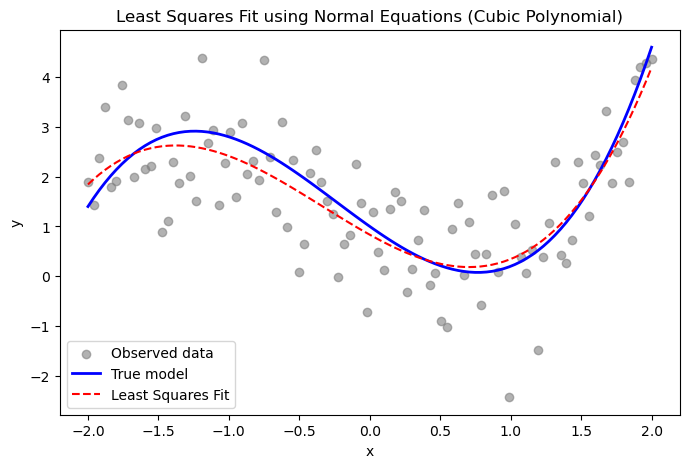

Chi-squared statistic: 77.24
Degrees of freedom: 96
Goodness-of-fit p-value: 0.9200
p-value is reasonable: The fit is consistent with the assumed model and uncertainties.


In [7]:
# Compute the global chi-squared statistic and p-value for the polynomial fit
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Repeat the polynomial fitting example to ensure all variables are defined
np.random.seed(42)
n_points = 100
x = np.linspace(-2, 2, n_points)
# True coefficients for cubic polynomial: y = a0 + a1*x + a2*x^2 + a3*x^3
true_coeffs = [1.0, -2.0, 0.5, 0.7]
y_true = (true_coeffs[0] +
          true_coeffs[1]*x +
          true_coeffs[2]*x**2 +
          true_coeffs[3]*x**3)
noise = np.random.normal(0, 1, n_points)
y_obs = y_true + noise

# Assume all data points have the same uncertainty (sigma = 1)
sigma = np.ones_like(y_obs)

# Build the design (forward) matrix G
G = np.vstack([np.ones_like(x), x, x**2, x**3]).T

# Solve normal equations: m = (G^T G)^(-1) G^T d
GTG = G.T @ G
GTd = G.T @ y_obs
m_est = np.linalg.inv(GTG) @ GTd

# Predicted data
y_pred = G @ m_est

# Print estimated coefficients
print("Estimated coefficients:", m_est)
print("True coefficients:", true_coeffs)

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(x, y_obs, label='Observed data', color='gray', alpha=0.6)
plt.plot(x, y_true, label='True model', color='blue', linewidth=2)
plt.plot(x, y_pred, label='Least Squares Fit', color='red', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Fit using Normal Equations (Cubic Polynomial)')
plt.show()

# Compute chi-squared statistic
residuals = y_obs - y_pred
chi2_stat = np.sum((residuals / sigma) ** 2)

# Degrees of freedom
N = len(y_obs)
p = len(m_est)
dof = N - p

print(f"Chi-squared statistic: {chi2_stat:.2f}")
print(f"Degrees of freedom: {dof}")

# Compute p-value: probability of obtaining chi2 >= observed, under null hypothesis
p_value = chi2.sf(chi2_stat, dof)
print(f"Goodness-of-fit p-value: {p_value:.4f}")

if p_value < 0.05:
    print("p-value < 0.05: The fit is unlikely under the model (poor fit or underestimated uncertainties).")
elif p_value > 0.95:
    print("p-value > 0.95: The fit is suspiciously good (uncertainties may be overestimated or overfitting).")
else:
    print("p-value is reasonable: The fit is consistent with the assumed model and uncertainties.")

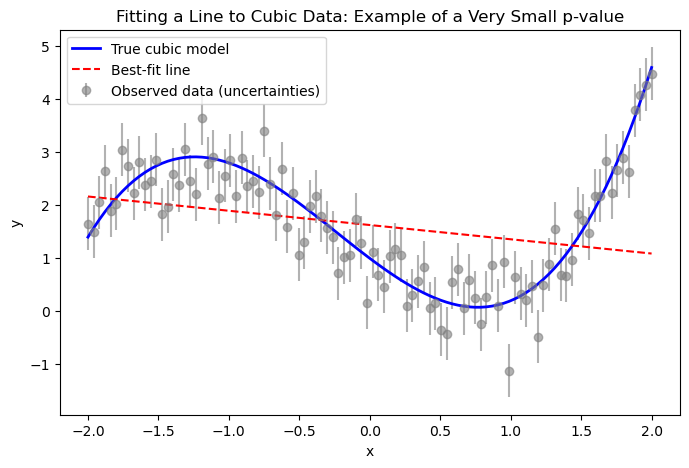

Chi-squared statistic: 477.88
Degrees of freedom: 98
Goodness-of-fit p-value: 2.4593e-51
p-value < 0.05: The fit is very unlikely under the model. The linear model is a poor fit for cubic data, especially with small uncertainties.


In [17]:
# Example: Fitting a line to data generated from a cubic polynomial (illustrates a very small p-value)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Generate synthetic data from a cubic polynomial
np.random.seed(42)
n_points = 100
x = np.linspace(-2, 2, n_points)
true_coeffs = [1.0, -2.0, 0.5, 0.7]  # Cubic: a0 + a1*x + a2*x^2 + a3*x^3
y_true = (true_coeffs[0] +
          true_coeffs[1]*x +
          true_coeffs[2]*x**2 +
          true_coeffs[3]*x**3)
# control the noise standard deviation
noise_std = .5
noise = np.random.normal(0, noise_std, n_points)
y_obs = y_true + noise

# Assign very small uncertainties to all points
sigma = np.full_like(y_obs, noise_std)

# Build the design matrix for a line (degree 1 polynomial)
G = np.vstack([np.ones_like(x), x]).T

# Weighted least squares solution for a line
W = np.diag(1/sigma**2)
GTWG = G.T @ W @ G
GTWy = G.T @ W @ y_obs
m_line = np.linalg.inv(GTWG) @ GTWy

y_pred_line = G @ m_line

# Plot results
plt.figure(figsize=(8, 5))
plt.errorbar(x, y_obs, yerr=sigma, fmt='o', label='Observed data (uncertainties)', color='gray', alpha=0.6)
plt.plot(x, y_true, label='True cubic model', color='blue', linewidth=2)
plt.plot(x, y_pred_line, label='Best-fit line', color='red', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting a Line to Cubic Data: Example of a Very Small p-value')
plt.show()

# Compute chi-squared statistic for the line fit
residuals = y_obs - y_pred_line
chi2_stat = np.sum((residuals / sigma) ** 2)

# Degrees of freedom
N = len(y_obs)
p = len(m_line)
dof = N - p

print(f"Chi-squared statistic: {chi2_stat:.2f}")
print(f"Degrees of freedom: {dof}")

# Compute p-value
p_value = chi2.sf(chi2_stat, dof)
print(f"Goodness-of-fit p-value: {p_value:.4e}")

if p_value < 0.05:
    print("p-value < 0.05: The fit is very unlikely under the model. The linear model is a poor fit for cubic data, especially with small uncertainties.")
else:
    print("p-value is not small: The fit is consistent with the assumed model and uncertainties.")

F-test results for increasing polynomial degree:
Degree 1 vs 2: F = 49.68, p-value = 0.0000
  Adding degree 2 term significantly improves the fit (p < 0.05)
Degree 2 vs 3: F = 296.81, p-value = 0.0000
  Adding degree 3 term significantly improves the fit (p < 0.05)
Degree 3 vs 4: F = 1.15, p-value = 0.2854
  Adding degree 4 term does NOT significantly improve the fit (p >= 0.05)
Degree 4 vs 5: F = 0.02, p-value = 0.8850
  Adding degree 5 term does NOT significantly improve the fit (p >= 0.05)
Degree 5 vs 6: F = 0.05, p-value = 0.8208
  Adding degree 6 term does NOT significantly improve the fit (p >= 0.05)


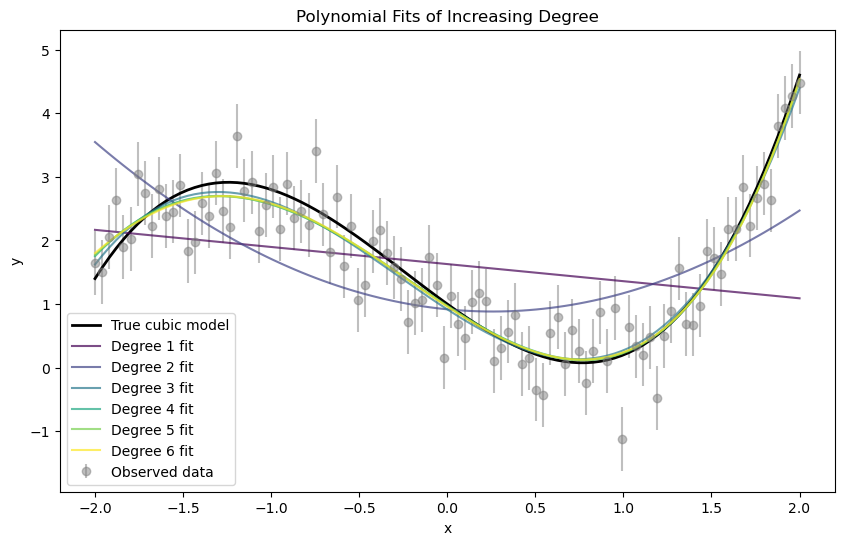

In [21]:
# Use the F-test to determine the optimal number of polynomial terms to fit the data (avoid overfitting)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, f

# Generate synthetic data from a cubic polynomial (same as previous cell)
np.random.seed(42)
n_points = 100
x = np.linspace(-2, 2, n_points)
true_coeffs = [1.0, -2.0, 0.5, 0.7]
y_true = (true_coeffs[0] +
          true_coeffs[1]*x +
          true_coeffs[2]*x**2 +
          true_coeffs[3]*x**3)
noise_std = 0.5
noise = np.random.normal(0, noise_std, n_points)
y_obs = y_true + noise
sigma = np.full_like(y_obs, noise_std)

max_degree = 6  # Try polynomials up to degree 6
chi2_list = []
dof_list = []
models = []

for deg in range(1, max_degree+1):
    G = np.vstack([x**i for i in range(deg+1)]).T
    W = np.diag(1/sigma**2)
    GTWG = G.T @ W @ G
    GTWy = G.T @ W @ y_obs
    m_fit = np.linalg.inv(GTWG) @ GTWy
    y_pred = G @ m_fit
    residuals = y_obs - y_pred
    chi2_stat = np.sum((residuals / sigma) ** 2)
    chi2_list.append(chi2_stat)
    dof = n_points - (deg+1)
    dof_list.append(dof)
    models.append((deg, m_fit, y_pred))

# F-test: Compare each model to the next more complex one
print("F-test results for increasing polynomial degree:")
for i in range(1, max_degree):
    chi2_1 = chi2_list[i-1]
    chi2_2 = chi2_list[i]
    p1 = i      # degree of simpler model
    p2 = i+1    # degree of more complex model
    dof2 = dof_list[i]
    F_stat = ((chi2_1 - chi2_2) / (p2 - p1)) / (chi2_2 / dof2)
    p_value = f.sf(F_stat, p2-p1, dof2)
    print(f"Degree {p1} vs {p2}: F = {F_stat:.2f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"  Adding degree {p2} term significantly improves the fit (p < 0.05)")
    else:
        print(f"  Adding degree {p2} term does NOT significantly improve the fit (p >= 0.05)")

# Plot fits for all degrees
plt.figure(figsize=(10, 6))
plt.errorbar(x, y_obs, yerr=sigma, fmt='o', label='Observed data', color='gray', alpha=0.5)
plt.plot(x, y_true, label='True cubic model', color='black', linewidth=2)
colors = plt.cm.viridis(np.linspace(0, 1, max_degree))
for i, (deg, m_fit, y_pred) in enumerate(models):
    plt.plot(x, y_pred, color=colors[i], label=f'Degree {deg} fit', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fits of Increasing Degree')
plt.legend()
plt.show()

In [20]:
# For each F-test, also compare the F-statistic to the critical value from the F-distribution
from scipy.stats import f

alpha = 0.05  # significance level
print("F-test results with critical value comparison:")
for i in range(1, max_degree):
    chi2_1 = chi2_list[i-1]
    chi2_2 = chi2_list[i]
    p1 = i      # degree of simpler model
    p2 = i+1    # degree of more complex model
    dof2 = dof_list[i]
    df_num = p2 - p1
    df_den = dof2
    F_stat = ((chi2_1 - chi2_2) / df_num) / (chi2_2 / df_den)
    p_value = f.sf(F_stat, df_num, df_den)
    F_crit = f.ppf(1 - alpha, df_num, df_den)
    print(f"Degree {p1} vs {p2}: F = {F_stat:.2f}, F_crit = {F_crit:.2f}, p-value = {p_value:.4f}")
    if F_stat > F_crit:
        print(f"  F = {F_stat:.2f} > F_crit = {F_crit:.2f}: Adding degree {p2} term is significant at alpha={alpha}")
    else:
        print(f"  F = {F_stat:.2f} <= F_crit = {F_crit:.2f}: Adding degree {p2} term is NOT significant at alpha={alpha}")
    if p_value < alpha:
        print(f"  (p-value < {alpha}: Adding degree {p2} term significantly improves the fit)")
    else:
        print(f"  (p-value >= {alpha}: Adding degree {p2} term does NOT significantly improve the fit)")

F-test results with critical value comparison:
Degree 1 vs 2: F = 49.68, F_crit = 3.94, p-value = 0.0000
  F = 49.68 > F_crit = 3.94: Adding degree 2 term is significant at alpha=0.05
  (p-value < 0.05: Adding degree 2 term significantly improves the fit)
Degree 2 vs 3: F = 296.81, F_crit = 3.94, p-value = 0.0000
  F = 296.81 > F_crit = 3.94: Adding degree 3 term is significant at alpha=0.05
  (p-value < 0.05: Adding degree 3 term significantly improves the fit)
Degree 3 vs 4: F = 1.15, F_crit = 3.94, p-value = 0.2854
  F = 1.15 <= F_crit = 3.94: Adding degree 4 term is NOT significant at alpha=0.05
  (p-value >= 0.05: Adding degree 4 term does NOT significantly improve the fit)
Degree 4 vs 5: F = 0.02, F_crit = 3.94, p-value = 0.8850
  F = 0.02 <= F_crit = 3.94: Adding degree 5 term is NOT significant at alpha=0.05
  (p-value >= 0.05: Adding degree 5 term does NOT significantly improve the fit)
Degree 5 vs 6: F = 0.05, F_crit = 3.94, p-value = 0.8208
  F = 0.05 <= F_crit = 3.94: Addin